In [3]:
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt

In [4]:

class MLP:
    def __init__(self, lr: float=1e-2, epochs: int = 100) -> None:
        self.lr = lr
        self.epochs = epochs
        self.weights = []
        self.bias = []
        self.layers = [3, 5, 1]
        self.loss =[]
        
    def _loss(self, y_true: np.array, y_pred: np.array) -> np.array:
        return -y_true*np.log2(y_pred) - (1 - y_true) * np.log2(1 - y_pred)
    
    def _derivative_loss(self, y_true: np.array, y_pred: np.array) -> np.array:
        return -((1/np.log(2)) * ((y_true/y_pred) - ((1-y_true)/(1-y_pred))))
    
    def _sigmoid(self, z: np.array) -> np.array:
        return 1/(1 + np.exp(-z))
    
    def _derivative_sigmoid(self, z: np.array) -> np.array:
        return self._sigmoid(z) * (1-self._sigmoid(z))

    def _forward_pass(self, X: np.array) -> Tuple[List[np.array], List[np.array]]:
        input_to_layer = np.copy(X)
        activations = [input_to_layer]
        derivatives = [np.zeros(X.shape)]
        
        #Hidden layer
        z_i = np.matmul(self.weights[0], input_to_layer) + self.bias[0].reshape(-1, 1)
        input_to_layer = self._sigmoid(z_i)
        activations.append(input_to_layer)
        derivatives.append(self._derivative_sigmoid(z_i))
        
        #Output layer
        z_i = np.matmul(self.weights[1], input_to_layer) + self.bias[1].reshape(-1, 1)
        input_to_layer = self._sigmoid(z_i)
        activations.append(input_to_layer)
        derivatives.append(self._derivative_sigmoid(z_i))
        
        return (activations, derivatives)
    
    def _backward_pass(self,
                       activations: List[np.array],
                       derivatives: List[np.array],
                       y: np.array) -> Tuple[List[np.array], List[np.array]]:
        
        self.loss.append((1/y.shape[1])*np.sum(self._loss(y, activations[-1])))
        
        #Output layer
        dl_dy2 = self._derivative_loss(y, activations[2])
        dl_dz2 = np.multiply(dl_dy2, derivatives[2])
        dl_dw2 = (1/y.shape[1]) * np.matmul(dl_dz2, activations[1].T)
        dl_db2 = (1/y.shape[1]) * np.sum(dl_dz2, axis=1)
        
        #Hidden layer
        dl_dy1 = np.matmul(self.weights[1].T, dl_dz2)
        dl_dz1 = np.multiply(dl_dy1, derivatives[1])
        dl_dw1 = (1/y.shape[1])*np.matmul(dl_dz1, activations[0].T)
        dl_db1 = (1/y.shape[1])*np.sum(dl_dz1, axis=1)
        
        return([dl_dw1, dl_dw2], [dl_db1, dl_db2])
        
    def _update_weights(self, dl_dw: List[np.array], dl_db: List[np.array]) -> None:
        self.weights[0] -= self.lr*dl_dw[0]
        self.weights[1] -= self.lr*dl_dw[1]
        self.bias[0]  -= self.lr*dl_db[0]
        self.bias[1]  -= self.lr*dl_db[1]
        
    def fit(self, X: np.array, y: np.array) -> None:
        self.weights.clear()
        self.bias.clear()
        self.loss.clear()
        
        for idx in range(len(self.layers)-1):
            self.weights.append(np.random.randn(self.layers[idx+1], self.layers[idx]) * 0.1)
            self.bias.append(np.random.randn(self.layers[idx+1]) * 0.1)
        
        for _ in range(self.epochs):
            activations, derivatives = self._forward_pass(X.T)
            dl_dw, dl_db = self._backward_pass(activations, derivatives, y.T)
            self._update_weights(dl_dw, dl_db)
            
    def predict(self, X: np.array) -> np.array:
        activations, _ = self._forward_pass(X.T)
        return np.rint(activations[2]).reshape(-1)
    
    
        

In [13]:
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]])

In [14]:
model = MLP(lr=0.5, epochs=2000)
model.layers = [2, 3, 1]  # 2 entradas, 3 neurônios na camada oculta, 1 saída


In [15]:
model.fit(X_xor, y_xor)


In [16]:
for x in X_xor:
    prediction = model.predict(x.reshape(1, -1))
    print(f"Entrada: {x}, Saída: {prediction[0]}")

Entrada: [0 0], Saída: 0.0
Entrada: [0 1], Saída: 0.0
Entrada: [1 0], Saída: 1.0
Entrada: [1 1], Saída: 1.0


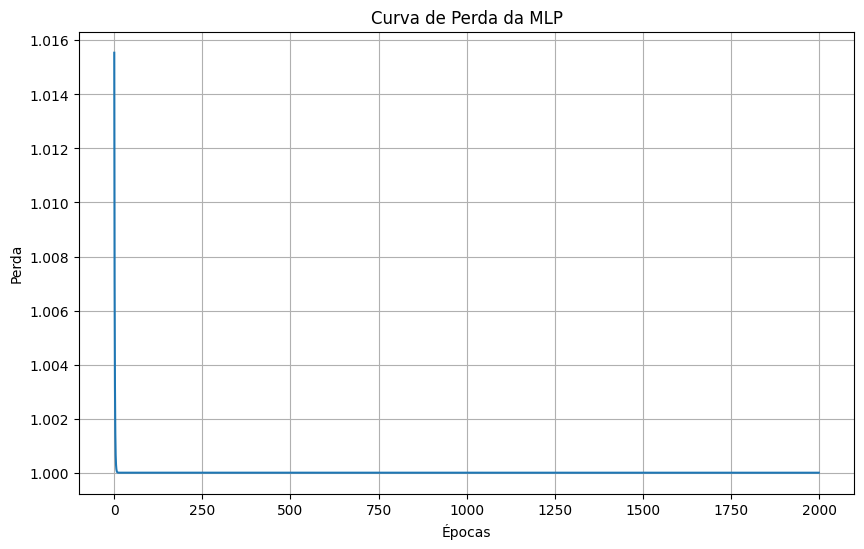

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(model.loss)
plt.title('Curva de Perda da MLP')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.grid(True)
plt.show()

In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X,y = make_classification(n_samples=10000, n_features=3, n_informative=2, n_redundant=1, random_state=42)


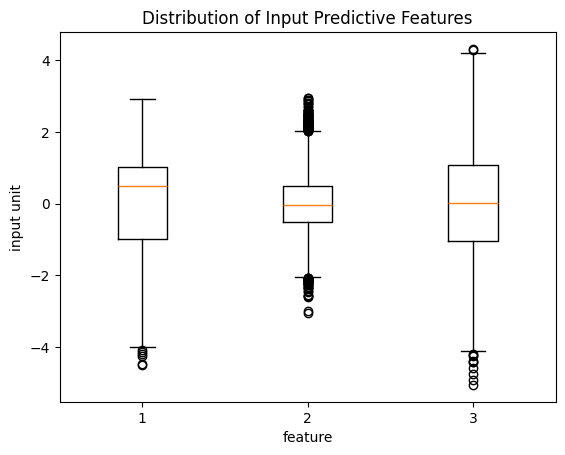

In [6]:
plt.boxplot(X)
plt.title("Distribution of Input Predictive Features")
plt.xlabel("feature")
plt.ylabel("input unit")
plt.show()

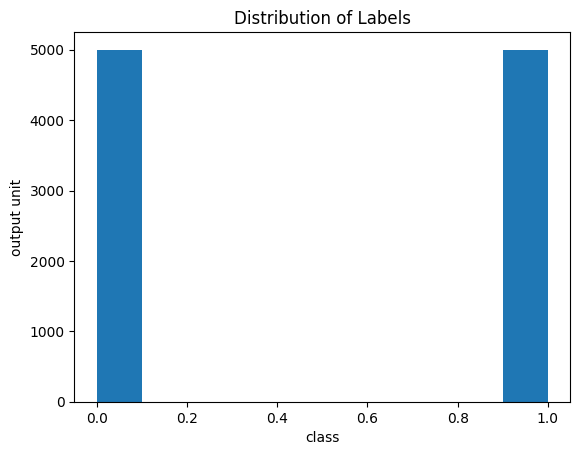

In [7]:
plt.hist(y)
plt.title("Distribution of Labels")
plt.xlabel("class")
plt.ylabel("output unit")
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = MLP(lr=1.0, epochs=2000)
model.fit(X_train,y_train.reshape(-1,1))

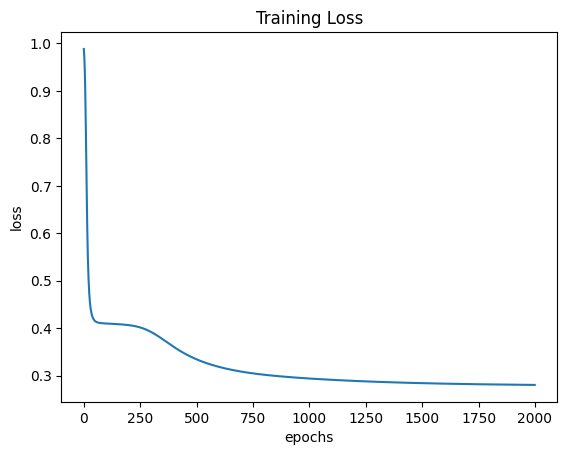

In [10]:
plt.plot(model.loss)
plt.title("Training Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [11]:

from sklearn.metrics import accuracy_score, f1_score

# generate predictions
y_pred = model.predict(X_test)

# evaluate model performance
print(f"accuracy: {accuracy_score(y_test, y_pred):.2f} and F1 score: {f1_score(y_test, y_pred):.2f}")

accuracy: 0.93 and F1 score: 0.93


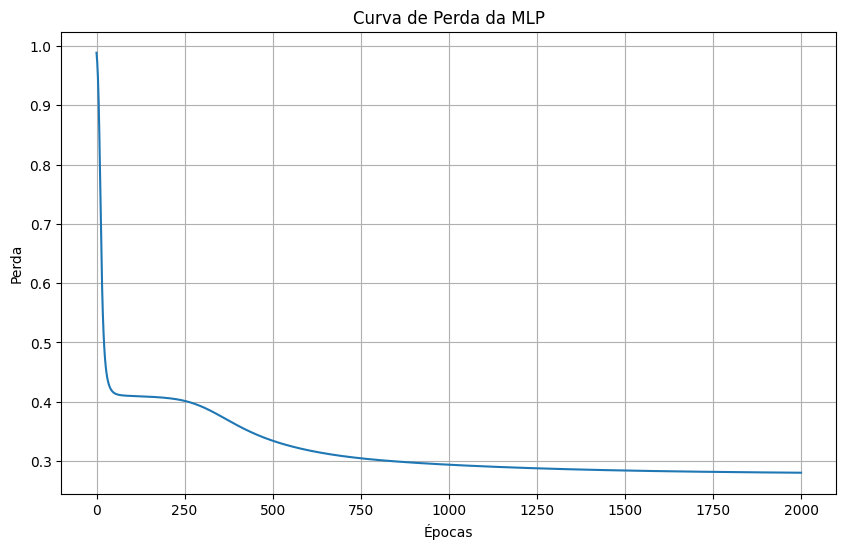

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(model.loss)
plt.title('Curva de Perda da MLP')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.grid(True)
plt.show()